DEFINING THE BANDIT ENCIRONMENT FOR EPSILON WITH DECAY

In [8]:
class Bandit_Environment(object):
    def __init__(self, q_values, true_optimal_arms):
        #if len(reward_probas) != len(rewards):
            #raise Exception(f"size of reward probas : {len(reward_probas)} does not match size of rewards: {len(rewards)}")
            
        self.q_values = q_values #qtrue bandit problem x number of arms []
        #self.rewards = rewards  # 
        self.k_arms  = len(q_values[0]) #length of rows in  bandit problem x number of arms []
        self.true_optimal_arms = true_optimal_arms
        self.number_of_bandit_problem = len(q_values) #length of columns in  bandit problem x number of arms []
        

DEFINING EPSILON GREEEDY WITH DECAY VALUE

In [9]:
class EpsilonGreedyAgent(object):
    def __init__(self, env, max_iterations, epsilon, epsilon_color, useDecay = False,decay = 0.001, decay_interval = 50):
        self.env = env 
        self.iterations = max_iterations
        self.epsilon = epsilon
        self.useDecay = useDecay
        self.epsilon_color = epsilon_color
        self.decay = decay
        self.decay_interval = decay_interval
  
        
    def execute(self):
       
        fig1=plt.figure().add_subplot(111)
        fig2=plt.figure().add_subplot(111)
        
      
        for eps in range(len(epsilon)):
            if self.useDecay:
                print("using epsilon value : ", self.epsilon[eps], "with decay : ", self.decay)
            else: 
                print("using epsilon value : ", self.epsilon[eps])
            
            Q_values = np.zeros((self.env.number_of_bandit_problem, self.env.k_arms)) #reward estimated
            arm_counts = np.ones((self.env.number_of_bandit_problem, self.env.k_arms))#number of times each arm was pulled. #each arm is pulled atleast once
            Q_at_i = np.random.normal(self.env.q_values, 1)#initial pulling of all arms where i = 1
        
     
            reward_eps = []
            reward_eps.append(0) #Q at 0 
            reward_eps.append(np.mean(Q_at_i)) #Q at 1
            reward_eps_optimal = []
            epsilonWithDecay = self.epsilon[eps] #initialize changing epsilon to initial epsilon before epsilon value each iteration
            
            for iteration in range(2, self.iterations + 1):
                actual_rewards =[] # all rewards in this pull/time-step
                optimal_arm_pull_count  = 0 # number of pulls of best arm in this time step
                
                for bp in range(self.env.number_of_bandit_problem):
                    if np.random.random() < epsilonWithDecay:
                        arm = np.random.randint(self.env.k_arms)
                    else:
                        arm = np.argmax(Q_values[bp])
                    
                    if arm == self.env.true_optimal_arms[bp]:
                        optimal_arm_pull_count = optimal_arm_pull_count+1 #add one to optimal arm count if the selected arm is the optimal arm
                   
                    reward = np.random.normal(self.env.q_values[bp][arm],1)
                    
                    actual_rewards.append(reward)
                    
                    arm_counts[bp][arm] = arm_counts[bp][arm]+1
                    
                    Q_values[bp][arm] = Q_values[bp][arm] + (reward - Q_values[bp][arm]) / arm_counts[bp][arm]
                    
                    if self.useDecay :
                        if iteration % self.decay_interval == 0:
                            epsilonWithDecay = epsilonWithDecay * self.decay #recalculate epsilonWithDecay
                    
                    
                    
                avg_actual_rewards = np.mean(actual_rewards)
                reward_eps.append(avg_actual_rewards)
                reward_eps_optimal.append(float(optimal_arm_pull_count) * 100  / self.env.number_of_bandit_problem)
            
           
            fig1.plot(range(0,self.iterations + 1),reward_eps,self.epsilon_color[eps])
            fig2.plot(range(2,self.iterations + 1),reward_eps_optimal,self.epsilon_color[eps])
            
        #print(reward_epsilons[eps])
        #print(reward_optimal_epsilons[eps])
                        
            
        plt.rc('text',usetex=False)
        #plt.ylim(0.5,1.5)
        fig1.title.set_text(r'$\epsilon$-greedy : Average Reward Vs Steps for 10 arms')
        fig1.set_ylabel('Average Reward')
        fig1.set_xlabel('Steps')
       # fig1.legend((r"$\epsilon=$"+str(epsilon[0]),r"$\epsilon=$"+str(epsilon[1]),r"$\epsilon=$"+str(epsilon[2]),r"$\epsilon=$"+str(epsilon[3]),r"$\epsilon=$"+str(epsilon[4])),loc='best')
        fig2.title.set_text(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 arms')
        fig2.set_ylabel(r'$\%$ Optimal Action')
        fig2.set_xlabel('Steps')
        fig2.set_ylim(0,100)
       # fig2.legend((r"$\epsilon=$"+str(epsilon[0]),r"$\epsilon=$"+str(epsilon[1]),r"$\epsilon=$"+str(epsilon[2]),r"$\epsilon=$"+str(epsilon[3]),r"$\epsilon=$"+str(epsilon[4])),loc='best')
        plt.show()


RUNNING THE EPSILON GREEDY WITH DECAY

using epsilon value :  0
using epsilon value :  0.01
using epsilon value :  0.1
using epsilon value :  0.2
using epsilon value :  1


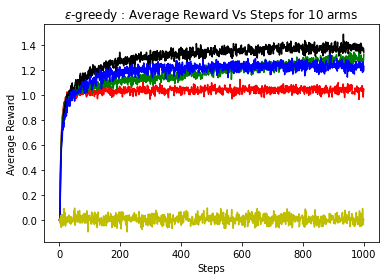

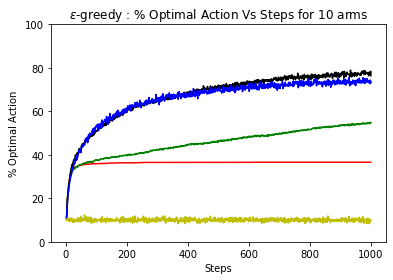

In [10]:
iterations = 1000
bandit_problem = 2000
no_of_arms = 10

q_values= np.random.normal(0,1,(bandit_problem ,no_of_arms))  #qtrue
true_optimal_arms = np.argmax(q_values,1)

environment = Bandit_Environment(q_values = q_values, true_optimal_arms = true_optimal_arms)


epsilon=[0,0.01,0.1,0.2,1] # epsilon in epsilon-greedy method
col=['r','g','k','b','y']


epgreedyAgent = EpsilonGreedyAgent(env = environment, max_iterations = iterations, epsilon = epsilon, epsilon_color = col)


play_history = epgreedyAgent.execute()


using epsilon value :  0 with decay :  0.1
using epsilon value :  0.01 with decay :  0.1
using epsilon value :  0.1 with decay :  0.1
using epsilon value :  0.2 with decay :  0.1
using epsilon value :  1 with decay :  0.1


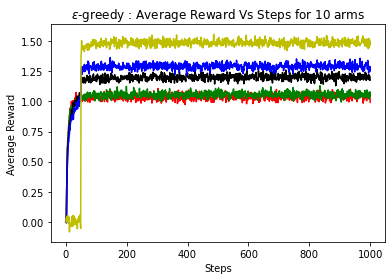

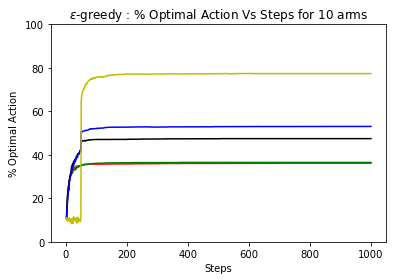

In [11]:
decay = 0.1
decay_interval = 50
epgreedyAgentwithDecay = EpsilonGreedyAgent(env = environment, max_iterations = iterations, epsilon = epsilon, epsilon_color = col, useDecay = True, decay = decay, decay_interval = decay_interval)
play_decay_history = epgreedyAgentwithDecay.execute()

